<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%208/Assignment_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt8-0.0.1-py3-none-any.whl


## Updates in this trial

> Changing the learning rate to 0.1

In [2]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([# transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                      #  transforms.RandomRotation(10),  
                                      #  transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                      #  transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5213603973388672 Batch_id=199 Accuracy=29.20: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.9735, Accuracy: 3988/10000 (39.88%)

EPOCH: 1


Loss=1.49453866481781 Batch_id=199 Accuracy=43.30: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.6044, Accuracy: 4896/10000 (48.96%)

EPOCH: 2


Loss=1.2529442310333252 Batch_id=199 Accuracy=50.20: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.2531, Accuracy: 5646/10000 (56.46%)

EPOCH: 3


Loss=1.3487277030944824 Batch_id=199 Accuracy=56.65: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.4402, Accuracy: 5878/10000 (58.78%)

EPOCH: 4


Loss=1.0447794198989868 Batch_id=199 Accuracy=62.13: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.5107, Accuracy: 6641/10000 (66.41%)

EPOCH: 5


Loss=0.8859223127365112 Batch_id=199 Accuracy=66.34: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.8481, Accuracy: 6945/10000 (69.45%)

EPOCH: 6


Loss=0.8854417204856873 Batch_id=199 Accuracy=69.19: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2993, Accuracy: 7071/10000 (70.71%)

EPOCH: 7


Loss=0.7582114934921265 Batch_id=199 Accuracy=71.77: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.6912, Accuracy: 7447/10000 (74.47%)

EPOCH: 8


Loss=0.7887020111083984 Batch_id=199 Accuracy=74.26: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.5037, Accuracy: 7771/10000 (77.71%)

EPOCH: 9


Loss=0.5705857872962952 Batch_id=199 Accuracy=76.37: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.2740, Accuracy: 7859/10000 (78.59%)

EPOCH: 10


Loss=0.6073943376541138 Batch_id=199 Accuracy=78.25: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.2713, Accuracy: 7961/10000 (79.61%)

EPOCH: 11


Loss=0.673215925693512 Batch_id=199 Accuracy=79.72: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.9092, Accuracy: 8020/10000 (80.20%)

EPOCH: 12


Loss=0.5845998525619507 Batch_id=199 Accuracy=80.87: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9933, Accuracy: 8149/10000 (81.49%)

EPOCH: 13


Loss=0.5322690010070801 Batch_id=199 Accuracy=81.89: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.8911, Accuracy: 8142/10000 (81.42%)

EPOCH: 14


Loss=0.3489881455898285 Batch_id=199 Accuracy=83.28: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.8273, Accuracy: 8345/10000 (83.45%)

EPOCH: 15


Loss=0.2881375551223755 Batch_id=199 Accuracy=87.45: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.8307, Accuracy: 8630/10000 (86.30%)

EPOCH: 16


Loss=0.22690892219543457 Batch_id=199 Accuracy=88.60: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.2022, Accuracy: 8660/10000 (86.60%)

EPOCH: 17


Loss=0.2753320336341858 Batch_id=199 Accuracy=89.25: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.4475, Accuracy: 8671/10000 (86.71%)

EPOCH: 18


Loss=0.2752898335456848 Batch_id=199 Accuracy=89.75: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.8149, Accuracy: 8696/10000 (86.96%)

EPOCH: 19


Loss=0.3313565254211426 Batch_id=199 Accuracy=89.86: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.9824, Accuracy: 8704/10000 (87.04%)

EPOCH: 20


Loss=0.31277939677238464 Batch_id=199 Accuracy=90.17: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.0045, Accuracy: 8695/10000 (86.95%)

EPOCH: 21


Loss=0.3077866733074188 Batch_id=199 Accuracy=90.79: 100%|██████████| 200/200 [00:36<00:00,  5.45it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.4728, Accuracy: 8712/10000 (87.12%)

EPOCH: 22


Loss=0.20281079411506653 Batch_id=199 Accuracy=90.82: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.4450, Accuracy: 8732/10000 (87.32%)

EPOCH: 23


Loss=0.2108568549156189 Batch_id=199 Accuracy=91.13: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.6746, Accuracy: 8762/10000 (87.62%)

EPOCH: 24


Loss=0.19641675055027008 Batch_id=199 Accuracy=91.52: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.6733, Accuracy: 8740/10000 (87.40%)

EPOCH: 25


Loss=0.21566656231880188 Batch_id=199 Accuracy=91.80: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.6678, Accuracy: 8732/10000 (87.32%)

EPOCH: 26


Loss=0.2147311568260193 Batch_id=199 Accuracy=92.02: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -11.9364, Accuracy: 8758/10000 (87.58%)

EPOCH: 27


Loss=0.19193725287914276 Batch_id=199 Accuracy=92.29: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.1296, Accuracy: 8762/10000 (87.62%)

EPOCH: 28


Loss=0.2519625425338745 Batch_id=199 Accuracy=92.73: 100%|██████████| 200/200 [00:36<00:00,  5.46it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.0206, Accuracy: 8757/10000 (87.57%)

EPOCH: 29


Loss=0.17191876471042633 Batch_id=199 Accuracy=92.94: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]



Test set: Average loss: -12.3258, Accuracy: 8742/10000 (87.42%)

Finished Training


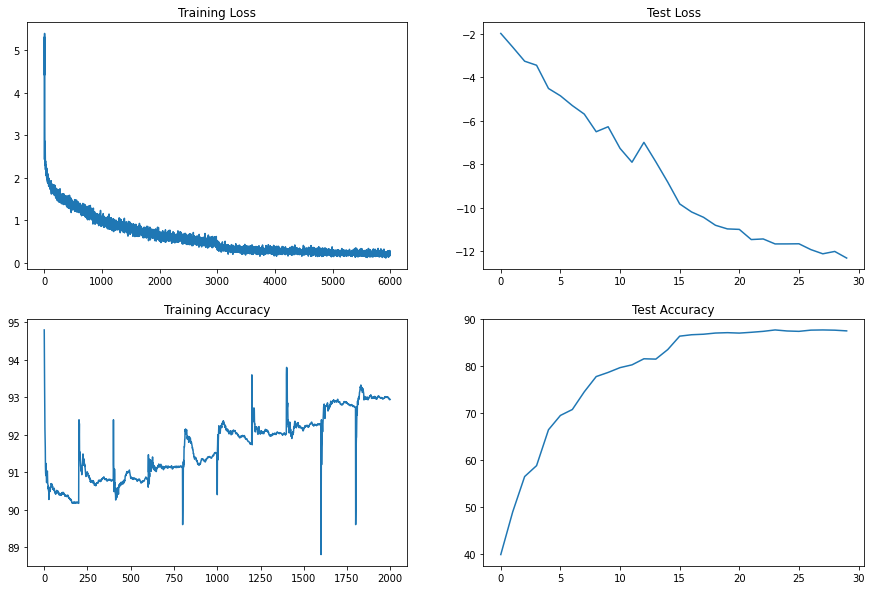

In [5]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 87 %
Accuracy of plane : 83 %
Accuracy of   car : 93 %
Accuracy of  bird : 85 %
Accuracy of   cat : 57 %
Accuracy of  deer : 80 %
Accuracy of   dog : 78 %
Accuracy of  frog : 94 %
Accuracy of horse : 81 %
Accuracy of  ship : 90 %
Accuracy of truck : 100 %


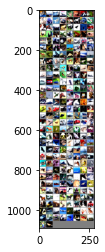

In [6]:
ViewModelPerformance(testloader,net,classes,device)